In [1]:
#Basic
import os
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

#Features
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

#ML - keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import BatchNormalization

#ML - sklearn
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

Using TensorFlow backend.


In [11]:
data = pd.read_csv('Data_Clean/features_scaled.csv', index_col=0)
X, y = data.drop('anti_vax', axis=1), data.anti_vax
data.head()

,has_article,has_text,anti_vax,has_img,percent_periods,percent_exclamations,percent_questionms,percent_equals,percent_dollars,ttr,...,article_liwc_money,article_liwc_relig,article_liwc_death,article_liwc_assent,article_liwc_nonflu,article_liwc_filler,article_host_other,article_host_nan,article_domain_other,article_domain_nan
0,True,True,False,True,-0.089595,-0.368165,0.516354,-0.027634,-0.054159,-0.425214,...,-0.175701,2.309986,0.751099,2.703415,-0.35144,-0.288059,1,0,1,0
1,True,True,False,True,-0.714421,-0.368165,-0.306288,-0.027634,-0.054159,0.738363,...,0.103232,0.837879,0.282351,1.777333,-0.35144,-0.288059,1,0,1,0
2,True,True,False,False,-0.714421,-0.368165,-0.306288,-0.027634,-0.054159,-0.923890,...,-0.873033,-1.035712,-0.811394,-0.383525,-0.35144,-0.288059,1,0,1,0
3,True,True,False,True,-0.126349,0.144675,-0.306288,-0.027634,-0.054159,-1.339453,...,-0.873033,0.302567,-0.811394,-0.383525,-0.35144,-0.288059,1,0,1,0
4,True,True,False,True,0.194417,-0.368165,0.890281,-0.027634,-0.054159,0.738363,...,0.754075,0.525613,-0.811394,-0.383525,-0.35144,-0.288059,1,0,1,0


In [13]:
data.shape

(89867, 213)

### Drop Insignificant Features

In [14]:
rfc_feature_estimator = RandomForestClassifier(n_estimators=100, 
                                               random_state=21)
rfc_feature_estimator.fit(X, y)
importances = pd.DataFrame({'Feature':X.columns, 
                            'Importance':rfc_feature_estimator.feature_importances_}
                          ).sort_values('Importance', ascending=False).set_index('Feature')
importances['Kept'] = importances.Importance >= importances.Importance.mean()
selector = SelectFromModel(rfc_feature_estimator, prefit=True)
X = selector.transform(X)
print(data.shape, ' => ', X.shape)

(89867, 213)  =>  (89867, 81)


### Dropped Features

In [15]:
print("Dropped Features:\n", importances[~importances.Kept].index.values)

Dropped Features:
 ['article_liwc_funct' 'liwc_scores_you' 'liwc_scores_sad'
 'liwc_scores_inhib' 'liwc_scores_hear' 'ttr' 'has_text'
 'liwc_scores_death' 'percent_pos_CD' 'liwc_scores_excl'
 'liwc_scores_numbers' 'article_readability_gunning_fog' 'percent_pos_VBP'
 'percent_pos_WP$' 'liwc_scores_feel' 'liwc_scores_discrep'
 'article_liwc_humans' 'liwc_scores_see' 'article_liwc_verbs'
 'percent_pos_JJR' 'liwc_scores_friends' 'percent_pos_VB' 'percent_pos_RB'
 'percent_pos_basic_r' 'article_liwc_pronoun' 'liwc_scores_filler'
 'article_liwc_relativ' 'liwc_scores_swear' 'article_liwc_health'
 'percent_pos_WDT' 'percent_pos_VBZ' 'article_liwc_present'
 'percent_pos_IN' 'liwc_scores_shehe' 'article_liwc_cogmech'
 'percent_equals' 'article_liwc_work' 'liwc_scores_assent'
 'article_liwc_family' 'article_liwc_wc' 'article_liwc_time'
 'percent_pos_FW' 'percent_pos_MD' 'article_liwc_wps' 'article_liwc_bio'
 'liwc_scores_we' 'article_liwc_posemo' 'article_liwc_affect'
 'liwc_scores_nonflu' 'perce

### Kept Features

In [16]:
importances[importances.Kept].head(30)

,Importance,Kept
Feature,,
sentiment_neg,0.027789,True
liwc_scores_dic,0.027750,True
sentiment_compound,0.025213,True
sentiment_pos,0.022153,True
liwc_counts_sixltr,0.020445,True
liwc_counts_wc,0.018720,True
article_liwc_dic,0.018126,True
percent_all_caps,0.016459,True
percent_linked_profiles,0.016173,True


### Define Models To Use

In [17]:
models = {
    'LinearSVC': {
        'model_base': LinearSVC,
        'param_grid': {
            'penalty': ['l2'],
            'fit_intercept': [True, False],
            'random_state': [20],
            'dual': [False]
        }
    },
    'DecisionTreeClassifier': {
        'model_base': DecisionTreeClassifier,
        'param_grid': {
            'criterion': ['gini', 'entropy']
        }
    },
    'AdaBoostClassifier': {
        'model_base': AdaBoostClassifier,
        'param_grid': {
            'n_estimators': [120],
            'learning_rate': [0.5, 0.8],
            'random_state': [30]
        }
    },
    'ExtraTreesClassifier': {
        'model_base': ExtraTreesClassifier,
        'param_grid': {
            'n_estimators': [90, 100],
            'criterion': ['gini', 'entropy'],
            'random_state': [503]
        }
    },
# KNC underperforming and taking 10x as long as others to train
#    'KNeighborsClassifier': {  
#        'model_base': KNeighborsClassifier,
#        'param_grid': {
#            'n_neighbors': [8]
#        }
#    },
    'RandomForestClassifier': {
        'model_base': RandomForestClassifier,
        'param_grid': {
            'n_estimators': [100],
            'criterion': ['gini', 'entropy'],
            'random_state': [940]
        }
    },
    'LogisticRegression': {
        'model_base': LogisticRegression,
        'param_grid': {
            'penalty': ['l2'],
            'fit_intercept': [True, False],
            'solver': ['liblinear'],
            'random_state': [382]
        }
    },
    'GradientBoostingClassifier': {
        'model_base': GradientBoostingClassifier,
        'param_grid': {
            'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1, 0.5, 0.8],
            'n_iter_no_change': [None, 5, 20],
            'random_state': [30]
        }
    }
}

### Score All Models

In [18]:
def score_best_model(model_base, param_grid, cv):
    gs = GridSearchCV(model_base(), param_grid=param_grid, cv=cv, 
                      verbose=1, n_jobs=-1, return_train_score=True)
    gs.fit(X, y)
    results = {'score_' + str(i) : score for i, score 
               in enumerate(list(gs.cv_results_['mean_test_score']))}
    results['best_score'] = gs.best_score_
    results['params'] = gs.best_params_
    return results
def pipeline(models, cv=5):
    results = []
    for name, m in models.items():
        print(name)
        result = score_best_model(*m.values(), cv)
        result['name'] = name
        results.append(result)
    return results
results = pipeline(models)
results = pd.DataFrame(results).set_index('name').sort_values(
    'best_score', ascending=False)
results

LinearSVC
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.2s finished


DecisionTreeClassifier
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   42.0s finished


AdaBoostClassifier
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished


ExtraTreesClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.8min finished


RandomForestClassifier
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.7min finished


LogisticRegression
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   33.5s finished


GradientBoostingClassifier
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 48.6min finished


,best_score,params,score_0,score_1,score_10,score_11,score_12,score_13,score_14,score_15,score_16,score_17,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9
name,,,,,,,,,,,,,,,,,,,,
GradientBoostingClassifier,0.772597,"{'learning_rate': 0.5, 'loss': 'exponential', ...",0.760835,0.760057,0.77095,0.77144,0.763973,0.765364,0.766689,0.766733,0.764741,0.764953,0.760057,0.761025,0.761147,0.761147,0.770394,0.768992,0.769315,0.772597
RandomForestClassifier,0.762271,"{'criterion': 'gini', 'n_estimators': 100, 'ra...",0.762271,0.762260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExtraTreesClassifier,0.757976,"{'criterion': 'entropy', 'n_estimators': 90, '...",0.755828,0.756907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.757976,0.757909,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoostClassifier,0.755817,"{'learning_rate': 0.5, 'n_estimators': 120, 'r...",0.755817,0.754849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LogisticRegression,0.738925,"{'fit_intercept': True, 'penalty': 'l2', 'rand...",0.738925,0.736622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LinearSVC,0.736844,"{'dual': False, 'fit_intercept': True, 'penalt...",0.736844,0.734196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,0.687138,{'criterion': 'entropy'},0.683109,0.687138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Best Model

In [19]:
print(results.iloc[0].name, results.iloc[0].params)

GradientBoostingClassifier {'learning_rate': 0.5, 'loss': 'exponential', 'n_iter_no_change': None, 'random_state': 30}


### Comparing to Keras NN Models

In [20]:
seed = np.random.seed(4)
def build_model(*layers):
    model = Sequential()
    for layer in layers:
        model.add(layer)
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy', 'binary_crossentropy'])
    return model
keras_models = {
    'baseline_12': build_model(
        Dense(12, input_dim=X.shape[1], activation='relu', use_bias=True), 
        Dense(1, activation='sigmoid')
    ),
    'baseline_12_dropout': build_model(
        Dense(12, input_dim=X.shape[1], activation='relu', use_bias=True),
        Dropout(rate=0.5),
        Dense(1, activation='sigmoid')
    ),
    'baseline_50': build_model(
        Dense(50, input_dim=X.shape[1], activation='relu', use_bias=True), 
        Dense(1, activation='sigmoid')
    ),
    'baseline_100': build_model(
        Dense(100, input_dim=X.shape[1], activation='relu', use_bias=True), 
        Dense(1, activation='sigmoid')
    ),
    'baseline_norm_50': build_model(
        BatchNormalization(),
        Dense(50, input_dim=X.shape[1], activation='relu', use_bias=True), 
        Dense(1, activation='sigmoid')
    ),
    'baseline_50_norm': build_model(
        Dense(50, input_dim=X.shape[1], activation='relu', use_bias=True), 
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ),
    'baseline_30_norm_12': build_model(
        Dense(30, input_dim=X.shape[1], activation='relu', use_bias=True), 
        BatchNormalization(),
        Dense(12, input_dim=X.shape[1], activation='relu', use_bias=True), 
        Dense(1, activation='sigmoid')
    )
}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
def train_model(model):
    return model.fit(X, y.values, validation_split=0.20, epochs=50)
nn_results = [(name, train_model(m)) for name, m in keras_models.items()]
nn_results = [(name, pd.DataFrame(hist.history)) for name, hist in nn_results]

Instructions for updating:
Use tf.cast instead.
Train on 71893 samples, validate on 17974 samples
Epoch 1/50
71893/71893 [==============================] - 5s 74us/step - loss: 0.5100 - acc: 0.7606 - binary_crossentropy: 0.5100 - val_loss: 0.6150 - val_acc: 0.6976 - val_binary_crossentropy: 0.6150
Epoch 2/50
71893/71893 [==============================] - 5s 63us/step - loss: 0.4592 - acc: 0.7911 - binary_crossentropy: 0.4592 - val_loss: 0.6163 - val_acc: 0.7010 - val_binary_crossentropy: 0.6163
Epoch 3/50
71893/71893 [==============================] - 4s 62us/step - loss: 0.4481 - acc: 0.7978 - binary_crossentropy: 0.4481 - val_loss: 0.5694 - val_acc: 0.7232 - val_binary_crossentropy: 0.5694
Epoch 4/50
71893/71893 [==============================] - 5s 64us/step - loss: 0.4409 - acc: 0.8003 - binary_crossentropy: 0.4409 - val_loss: 0.5597 - val_acc: 0.7311 - val_binary_crossentropy: 0.5597
Epoch 5/50
71893/71893 [==============================] - 5s 63us/step - loss: 0.4369 - acc: 0.803

Epoch 40/50
71893/71893 [==============================] - 4s 63us/step - loss: 0.4145 - acc: 0.8148 - binary_crossentropy: 0.4145 - val_loss: 0.5968 - val_acc: 0.7197 - val_binary_crossentropy: 0.5968
Epoch 41/50
71893/71893 [==============================] - 4s 62us/step - loss: 0.4142 - acc: 0.8151 - binary_crossentropy: 0.4142 - val_loss: 0.5925 - val_acc: 0.7178 - val_binary_crossentropy: 0.5925
Epoch 42/50
71893/71893 [==============================] - 5s 65us/step - loss: 0.4144 - acc: 0.8147 - binary_crossentropy: 0.4144 - val_loss: 0.5696 - val_acc: 0.7327 - val_binary_crossentropy: 0.5696
Epoch 43/50
71893/71893 [==============================] - 4s 62us/step - loss: 0.4142 - acc: 0.8154 - binary_crossentropy: 0.4142 - val_loss: 0.5872 - val_acc: 0.7207 - val_binary_crossentropy: 0.5872
Epoch 44/50
71893/71893 [==============================] - 4s 63us/step - loss: 0.4140 - acc: 0.8148 - binary_crossentropy: 0.4140 - val_loss: 0.5865 - val_acc: 0.7282 - val_binary_crossentrop

71893/71893 [==============================] - 5s 66us/step - loss: 0.4914 - acc: 0.7706 - binary_crossentropy: 0.4914 - val_loss: 0.5873 - val_acc: 0.7180 - val_binary_crossentropy: 0.5873
Epoch 31/50
71893/71893 [==============================] - 5s 66us/step - loss: 0.4923 - acc: 0.7698 - binary_crossentropy: 0.4923 - val_loss: 0.5819 - val_acc: 0.7151 - val_binary_crossentropy: 0.5819
Epoch 32/50
71893/71893 [==============================] - 5s 66us/step - loss: 0.4887 - acc: 0.7732 - binary_crossentropy: 0.4887 - val_loss: 0.5889 - val_acc: 0.7151 - val_binary_crossentropy: 0.5889
Epoch 33/50
71893/71893 [==============================] - 5s 67us/step - loss: 0.4905 - acc: 0.7709 - binary_crossentropy: 0.4905 - val_loss: 0.6053 - val_acc: 0.7070 - val_binary_crossentropy: 0.6053
Epoch 34/50
71893/71893 [==============================] - 5s 66us/step - loss: 0.4910 - acc: 0.7721 - binary_crossentropy: 0.4910 - val_loss: 0.6015 - val_acc: 0.7074 - val_binary_crossentropy: 0.6015
Ep

71893/71893 [==============================] - 5s 66us/step - loss: 0.3812 - acc: 0.8322 - binary_crossentropy: 0.3812 - val_loss: 0.6200 - val_acc: 0.7163 - val_binary_crossentropy: 0.6200
Epoch 21/50
71893/71893 [==============================] - 5s 66us/step - loss: 0.3801 - acc: 0.8327 - binary_crossentropy: 0.3801 - val_loss: 0.5713 - val_acc: 0.7495 - val_binary_crossentropy: 0.5713
Epoch 22/50
71893/71893 [==============================] - 5s 65us/step - loss: 0.3792 - acc: 0.8333 - binary_crossentropy: 0.3792 - val_loss: 0.6127 - val_acc: 0.7269 - val_binary_crossentropy: 0.6127
Epoch 23/50
71893/71893 [==============================] - 5s 66us/step - loss: 0.3792 - acc: 0.8335 - binary_crossentropy: 0.3792 - val_loss: 0.6113 - val_acc: 0.7260 - val_binary_crossentropy: 0.6113
Epoch 24/50
71893/71893 [==============================] - 5s 67us/step - loss: 0.3772 - acc: 0.8338 - binary_crossentropy: 0.3772 - val_loss: 0.6413 - val_acc: 0.7081 - val_binary_crossentropy: 0.6413
Ep

71893/71893 [==============================] - 5s 69us/step - loss: 0.3842 - acc: 0.8308 - binary_crossentropy: 0.3842 - val_loss: 0.6093 - val_acc: 0.7247 - val_binary_crossentropy: 0.6093
Epoch 11/50
71893/71893 [==============================] - 5s 70us/step - loss: 0.3803 - acc: 0.8322 - binary_crossentropy: 0.3803 - val_loss: 0.5789 - val_acc: 0.7387 - val_binary_crossentropy: 0.5789
Epoch 12/50
71893/71893 [==============================] - 5s 70us/step - loss: 0.3775 - acc: 0.8332 - binary_crossentropy: 0.3775 - val_loss: 0.6134 - val_acc: 0.7259 - val_binary_crossentropy: 0.6134
Epoch 13/50
71893/71893 [==============================] - 5s 69us/step - loss: 0.3745 - acc: 0.8351 - binary_crossentropy: 0.3745 - val_loss: 0.5495 - val_acc: 0.7549 - val_binary_crossentropy: 0.5495
Epoch 14/50
71893/71893 [==============================] - 5s 69us/step - loss: 0.3714 - acc: 0.8365 - binary_crossentropy: 0.3714 - val_loss: 0.6263 - val_acc: 0.7203 - val_binary_crossentropy: 0.6263
Ep

71893/71893 [==============================] - 5s 68us/step - loss: 0.3157 - acc: 0.8650 - binary_crossentropy: 0.3157 - val_loss: 0.6788 - val_acc: 0.7267 - val_binary_crossentropy: 0.6788
Train on 71893 samples, validate on 17974 samples
Epoch 1/50
71893/71893 [==============================] - 6s 82us/step - loss: 0.4935 - acc: 0.7673 - binary_crossentropy: 0.4935 - val_loss: 0.5847 - val_acc: 0.7225 - val_binary_crossentropy: 0.5847
Epoch 2/50
71893/71893 [==============================] - 5s 75us/step - loss: 0.4586 - acc: 0.7915 - binary_crossentropy: 0.4586 - val_loss: 0.5381 - val_acc: 0.7471 - val_binary_crossentropy: 0.5381
Epoch 3/50
71893/71893 [==============================] - 5s 74us/step - loss: 0.4477 - acc: 0.7980 - binary_crossentropy: 0.4477 - val_loss: 0.5044 - val_acc: 0.7736 - val_binary_crossentropy: 0.5044
Epoch 4/50
71893/71893 [==============================] - 5s 75us/step - loss: 0.4418 - acc: 0.8009 - binary_crossentropy: 0.4418 - val_loss: 0.5309 - val_ac

71893/71893 [==============================] - 5s 75us/step - loss: 0.3975 - acc: 0.8243 - binary_crossentropy: 0.3975 - val_loss: 0.5204 - val_acc: 0.7665 - val_binary_crossentropy: 0.5204
Epoch 41/50
71893/71893 [==============================] - 5s 75us/step - loss: 0.3964 - acc: 0.8231 - binary_crossentropy: 0.3964 - val_loss: 0.5019 - val_acc: 0.7807 - val_binary_crossentropy: 0.5019
Epoch 42/50
71893/71893 [==============================] - 5s 75us/step - loss: 0.3976 - acc: 0.8239 - binary_crossentropy: 0.3976 - val_loss: 0.5416 - val_acc: 0.7538 - val_binary_crossentropy: 0.5416
Epoch 43/50
71893/71893 [==============================] - 5s 74us/step - loss: 0.3977 - acc: 0.8229 - binary_crossentropy: 0.3977 - val_loss: 0.5568 - val_acc: 0.7539 - val_binary_crossentropy: 0.5568
Epoch 44/50
71893/71893 [==============================] - 5s 75us/step - loss: 0.3954 - acc: 0.8245 - binary_crossentropy: 0.3954 - val_loss: 0.4899 - val_acc: 0.7838 - val_binary_crossentropy: 0.4899
Ep

71893/71893 [==============================] - 6s 79us/step - loss: 0.3946 - acc: 0.8255 - binary_crossentropy: 0.3946 - val_loss: 0.5750 - val_acc: 0.7386 - val_binary_crossentropy: 0.5750
Epoch 31/50
71893/71893 [==============================] - 6s 79us/step - loss: 0.3945 - acc: 0.8261 - binary_crossentropy: 0.3945 - val_loss: 0.6062 - val_acc: 0.7253 - val_binary_crossentropy: 0.6062
Epoch 32/50
71893/71893 [==============================] - 5s 76us/step - loss: 0.3940 - acc: 0.8259 - binary_crossentropy: 0.3940 - val_loss: 0.5950 - val_acc: 0.7288 - val_binary_crossentropy: 0.5950
Epoch 33/50
71893/71893 [==============================] - 6s 77us/step - loss: 0.3930 - acc: 0.8261 - binary_crossentropy: 0.3930 - val_loss: 0.5651 - val_acc: 0.7455 - val_binary_crossentropy: 0.5651
Epoch 34/50
71893/71893 [==============================] - 6s 79us/step - loss: 0.3926 - acc: 0.8273 - binary_crossentropy: 0.3926 - val_loss: 0.6194 - val_acc: 0.7197 - val_binary_crossentropy: 0.6194
Ep

71893/71893 [==============================] - 6s 81us/step - loss: 0.4008 - acc: 0.8199 - binary_crossentropy: 0.4008 - val_loss: 0.5685 - val_acc: 0.7333 - val_binary_crossentropy: 0.5685
Epoch 21/50
71893/71893 [==============================] - 6s 82us/step - loss: 0.4006 - acc: 0.8208 - binary_crossentropy: 0.4006 - val_loss: 0.5481 - val_acc: 0.7444 - val_binary_crossentropy: 0.5481
Epoch 22/50
71893/71893 [==============================] - 6s 80us/step - loss: 0.3991 - acc: 0.8215 - binary_crossentropy: 0.3991 - val_loss: 0.5800 - val_acc: 0.7271 - val_binary_crossentropy: 0.5800
Epoch 23/50
71893/71893 [==============================] - 6s 80us/step - loss: 0.3976 - acc: 0.8230 - binary_crossentropy: 0.3976 - val_loss: 0.5581 - val_acc: 0.7430 - val_binary_crossentropy: 0.5581
Epoch 24/50
71893/71893 [==============================] - 6s 81us/step - loss: 0.3962 - acc: 0.8225 - binary_crossentropy: 0.3962 - val_loss: 0.5650 - val_acc: 0.7336 - val_binary_crossentropy: 0.5650
Ep

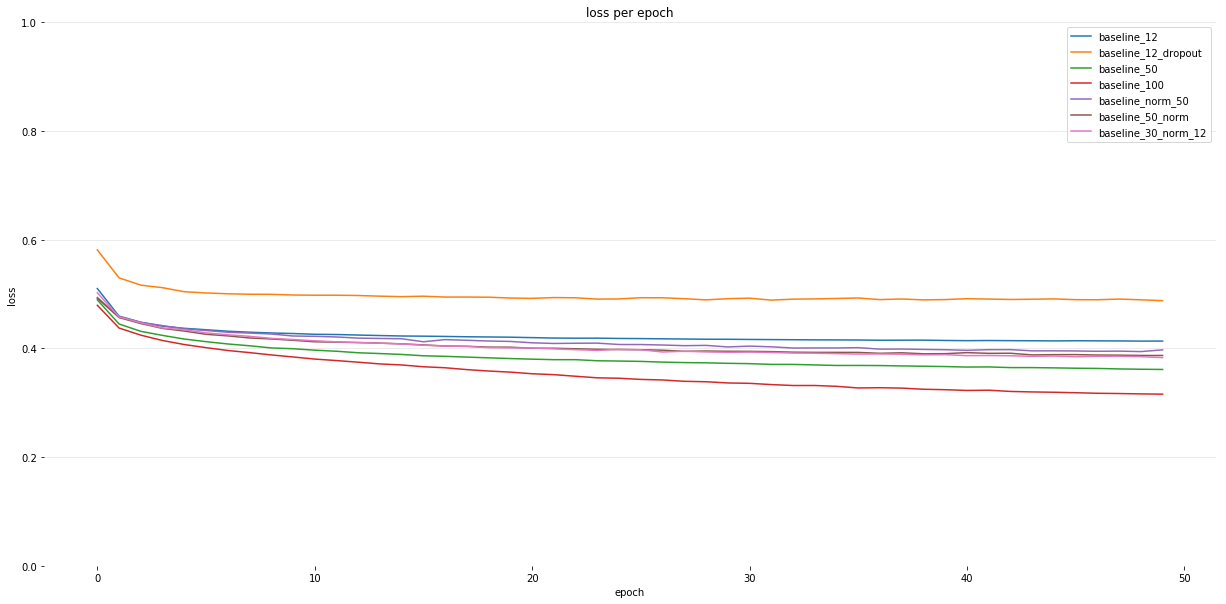

In [22]:
def plot_epochs(results, col, **kwargs):
    def plot_epoch_helper(hist_df, col, ax):
        ax.plot(hist_df[col], **kwargs)
        ax.set_title(col + ' per epoch')
        ax.set_ylabel(col)
        ax.set_xlabel('epoch')
        for sp in ax.spines:
            ax.spines[sp].set_visible(False)
        ax.yaxis.grid(True, alpha=0.3)
        ax.legend(labels=[n[0] for n in nn_results])
        ax.set_ylim(0, 1)
    fig, ax = plt.subplots(figsize=(21, 10))
    for name, hist in results:
        plot_epoch_helper(hist, col, ax)
plot_epochs(nn_results, 'loss')

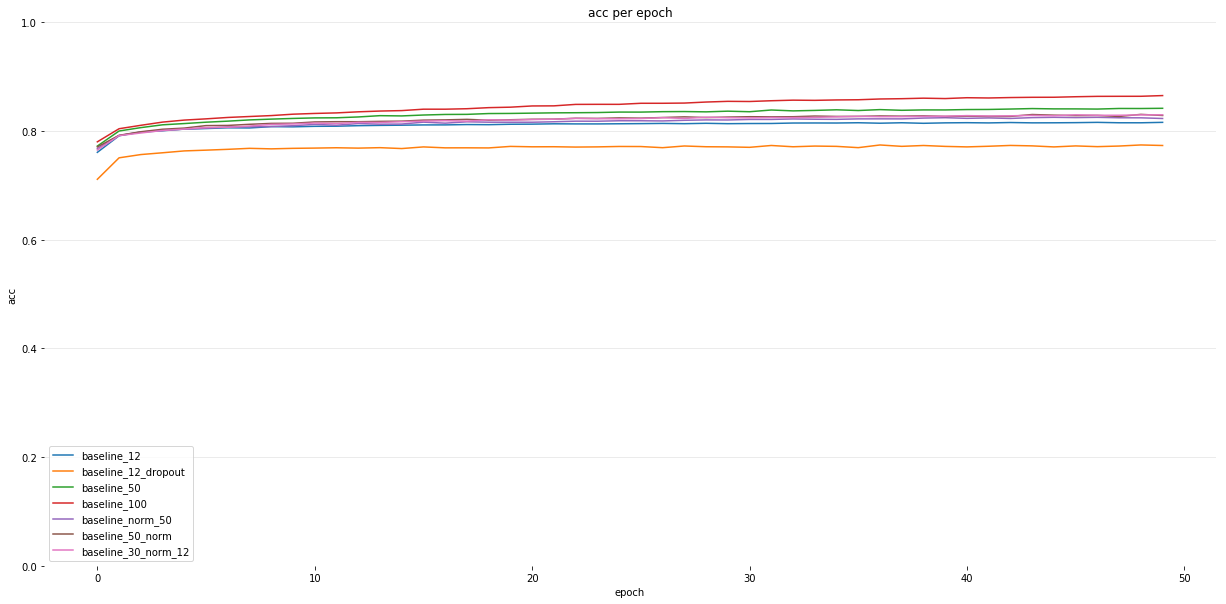

In [23]:
plot_epochs(nn_results, 'acc')

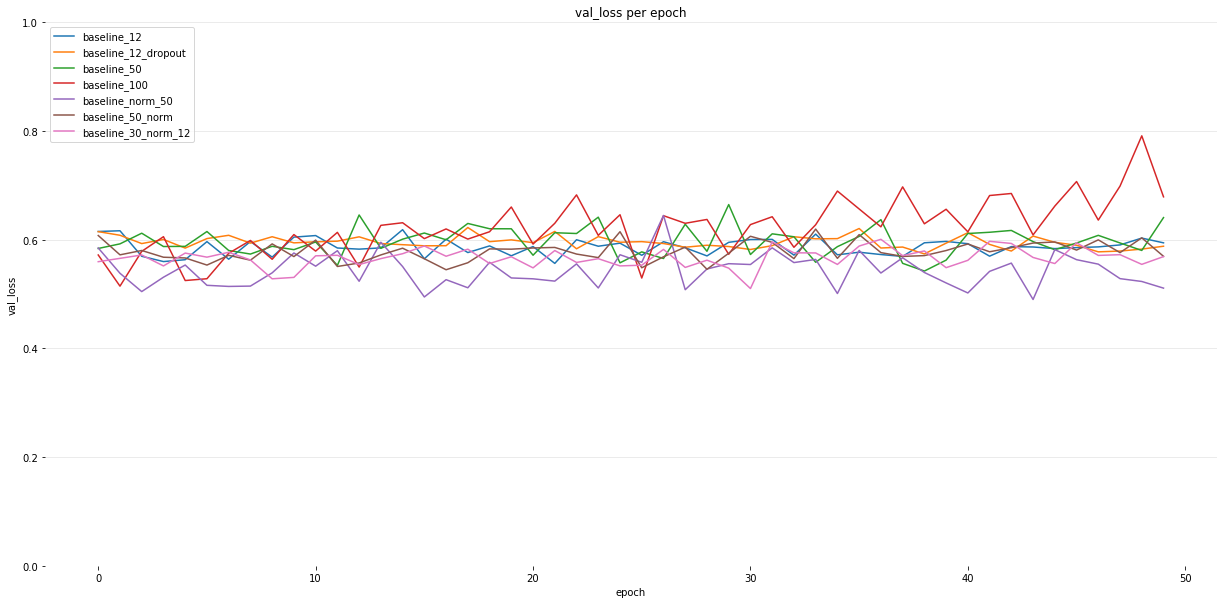

In [24]:
plot_epochs(nn_results, 'val_loss')

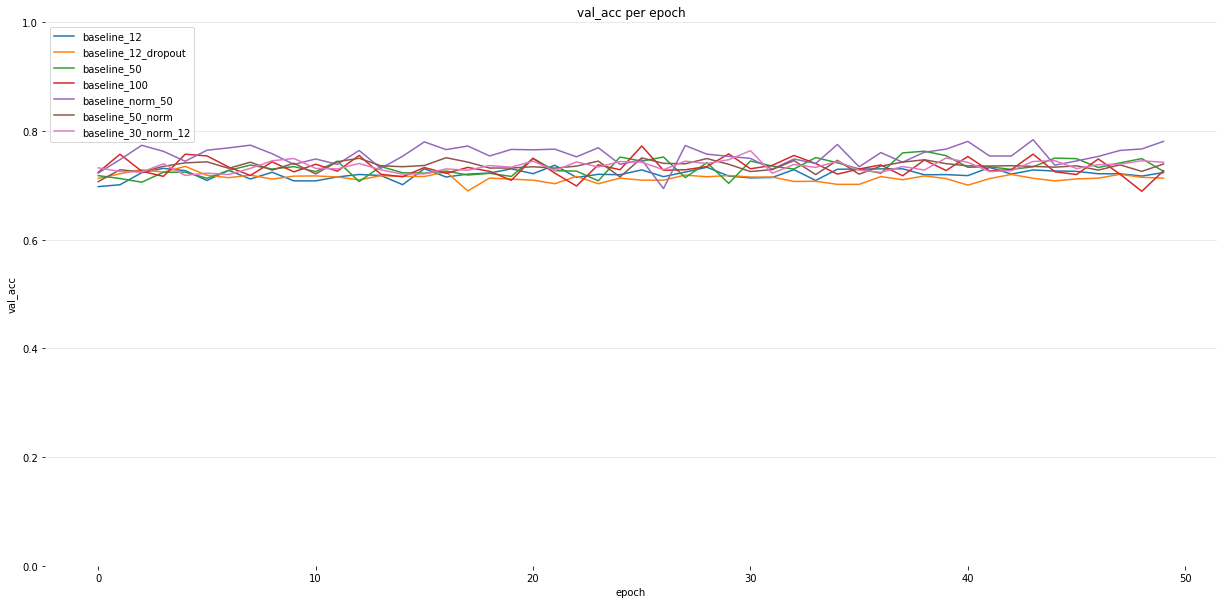

In [25]:
plot_epochs(nn_results, 'val_acc')